In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

in_file = 'Data.csv'
full_data = pd.read_csv(in_file)
full_data.head()

,people,starttime,comments,pageviews,negative,neutral,official,hot,new,reply,type
0,����ؼ�ʾ�,20161010,1,9,0,1,0,0,0,1,raiders
1,����ؼ�ʾ�,20161010,1,8,0,0,0,0,0,1,communication
2,Chivele-Ӱ,20161010,1,6,0,1,0,0,0,1,raiders
3,shjansh,20161010,1,8,0,0,0,0,1,1,communication
4,pƮ���Ҷ,20161010,1,14,0,1,0,0,1,1,activity


In [2]:
full_data['people']=full_data['people'].apply(lambda x:len(x))
full_data.describe()

,people,starttime,comments,pageviews,negative,neutral,official,hot,reply
count,326.000000,3.260000e+02,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000
mean,7.392638,2.016085e+07,2.840491,257.027607,0.030675,0.950920,0.325153,0.205521,0.453988
std,2.743239,2.126520e+02,6.645231,486.905364,0.172700,0.216367,0.469152,0.404703,0.498644
min,3.000000,2.016032e+07,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.250000,2.016071e+07,0.000000,34.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,8.000000,2.016093e+07,1.000000,104.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,10.000000,2.016101e+07,3.000000,237.000000,0.000000,1.000000,1.000000,0.000000,1.000000
max,15.000000,2.016101e+07,67.000000,4706.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [3]:
full_data['starttime']=full_data['starttime'].apply(lambda x:(x-20160000))

In [4]:
full_data.head()

,people,starttime,comments,pageviews,negative,neutral,official,hot,new,reply,type
0,10,1010,1,9,0,1,0,0,0,1,raiders
1,10,1010,1,8,0,0,0,0,0,1,communication
2,10,1010,1,6,0,1,0,0,0,1,raiders
3,7,1010,1,8,0,0,0,0,1,1,communication
4,9,1010,1,14,0,1,0,0,1,1,activity


In [10]:
act_data=full_data[(full_data['starttime']>923)&(full_data['starttime']<1010)]
act_data.describe()

,people,starttime,comments,pageviews,negative,neutral,official,hot,reply
count,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000
mean,8.405714,991.811429,2.171429,168.737143,0.040000,0.942857,0.102857,0.205714,0.462857
std,2.639438,29.530889,5.263656,500.025355,0.196521,0.232781,0.304644,0.405383,0.500049
min,3.000000,924.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,1001.000000,0.000000,18.500000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,8.000000,1002.000000,1.000000,47.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,10.000000,1009.000000,2.000000,128.500000,0.000000,1.000000,0.000000,0.000000,1.000000
max,15.000000,1009.000000,58.000000,4706.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
def count(data):
    count=0
    if data['']

Populating the interactive namespace from numpy and matplotlib


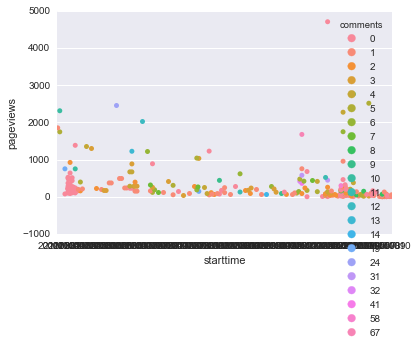

In [3]:
import matplotlib.pyplot as plt
%pylab inline
sns.swarmplot(x='starttime',y='pageviews',hue='comments',data=full_data)